<a href="https://colab.research.google.com/github/myredex/tensorflow_tutorials/blob/master/02_tensorflow_binary_classification_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification using Tensorflow

### Generate toy data for binary classification

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.02,
                    random_state=42)

X[:2], y[:2]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ]]),
 array([1, 1]))

### Split data to train and test 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Data visualisation

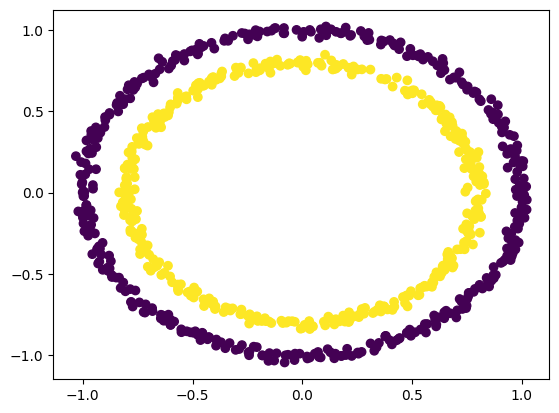

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [ ]:
# Create perfomance visualisation function
def visualize_predictions(X_test, y_test, y_pred):

  plt.figure(figsize=(12, 6))

  # Plot test data
  plt.subplot(1, 2, 1)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

  # Plot predicted dat
  plt.subplot(1, 2, 2)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

### Create binary classification model with Tensorflow

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit model
history = model.fit(X_train, y_train,
                    epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.4412
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4725
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4975
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.4900
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5125
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5512
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5288
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5888
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.5913
Epoch 11/25
25/25 [

7/7 [==============================] - 0s 4ms/step


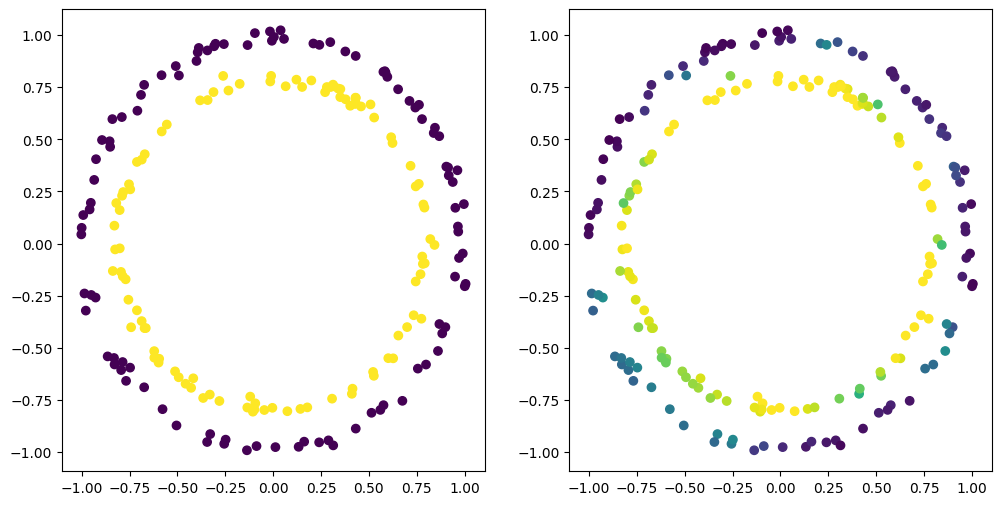

In [ ]:
y_pred = model.predict(X_test)

visualize_predictions(X_test, y_test, y_pred)

### Evaluate model

In [ ]:
# Evaluate model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 1.0000


[0.225379079580307, 1.0]

In [ ]:
y_test[0], y_pred[0]

(1, array([0.80943114], dtype=float32))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tf.round(y_pred))

cm

array([[100,   0],
       [  0, 100]])

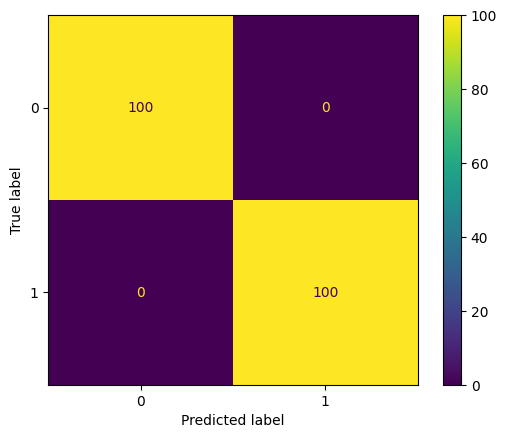

In [ ]:
ConfusionMatrixDisplay(cm).plot()